In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

files = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226579_C56ctr_raw_counts.csv/GSM5226579_C56ctr_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226600_L22cov_raw_counts.csv/GSM5226600_L22cov_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226585_L05cov_raw_counts.csv/GSM5226585_L05cov_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226587_L07cov_raw_counts.csv/GSM5226587_L07cov_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226598_L19cov_raw_counts.csv/GSM5226598_L19cov_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226595_L16cov_raw_counts.csv/GSM5226595_L16cov_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226580_C57ctr_raw_counts.csv/GSM5226580_C57ctr_raw_counts.csv
/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226594_L15cov_raw_counts.csv/GSM5226594_L15cov_raw_counts.csv


In [5]:
! pip install scanpy scvi-tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.1/96.1 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.7/292.7 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.7/722.7 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 5.2 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=7a373118df5a709d391e76400b48be9f42f847712aacb5645ea7a90b1418acdd
  Stored in directory: /root/.cache/pip/wheels/4b/a1/89/8c863c13903012831ee9e6f0544375e06de9c461659e968c40
  Created wheel for ml-collections: filename=ml

In [6]:
import scvi
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:54: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  "pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6"
/opt/conda/lib/python3.7/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [7]:
adata = sc.read_csv("/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226579_C56ctr_raw_counts.csv/GSM5226579_C56ctr_raw_counts.csv").T
adata

AnnData object with n_obs × n_vars = 4090 × 34546

In [9]:
adata.obs.head() # Observation dataframe

""
TAGACTGAGGCATGCA-1_6
TCATTTGGTCACCGCA-1_6
GACCTTCAGGACTTCT-1_6
ACACGCGAGTACAACA-1_6
TTCTAACTCGGTATGT-1_6


In [10]:
adata.var.head() # Genes

""
AL627309.1
AL627309.5
AL627309.4
AL669831.2
LINC01409


In [11]:
import scvi

In [12]:
! pip install scikit-misc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 16.5 MB/s eta 0:00:0000:0100:01


In [13]:
sc.pp.filter_genes(adata, min_cells=10) # All genes present in atleast 10 cells
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor="seurat_v3") # 2000 top variable genes (describe the data)

In [14]:
scvi.model.SCVI.setup_anndata(adata)
vae = scvi.model.SCVI(adata)
vae.train()

Epoch 400/400: 100%|██████████| 400/400 [09:07<00:00,  1.37s/it, loss=326, v_num=1]


In [15]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                            


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


Epoch 164/400:  41%|████      | 164/400 [01:07<01:37,  2.43it/s, loss=0.262, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.231. Signaling Trainer to stop.


In [16]:
df = solo.predict()
df['prediction'] = solo.predict(soft=False)

df.index = df.index.map(lambda x: x[:-2])

df.head()

,doublet,singlet,prediction
TAGACTGAGGCATGCA-1_6,0.163148,0.605882,singlet
TCATTTGGTCACCGCA-1_6,1.995485,-1.792303,doublet
GACCTTCAGGACTTCT-1_6,0.676177,-0.399238,doublet
ACACGCGAGTACAACA-1_6,0.452940,-1.035750,doublet
TTCTAACTCGGTATGT-1_6,0.937032,-0.423973,doublet


In [17]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,601,601
singlet,3489,3489


In [18]:
df['dif'] = df['doublet'] - df['singlet']
df.head()

,doublet,singlet,prediction,dif
TAGACTGAGGCATGCA-1_6,0.163148,0.605882,singlet,-0.442734
TCATTTGGTCACCGCA-1_6,1.995485,-1.792303,doublet,3.787789
GACCTTCAGGACTTCT-1_6,0.676177,-0.399238,doublet,1.075414
ACACGCGAGTACAACA-1_6,0.452940,-1.035750,doublet,1.488690
TTCTAACTCGGTATGT-1_6,0.937032,-0.423973,doublet,1.361005


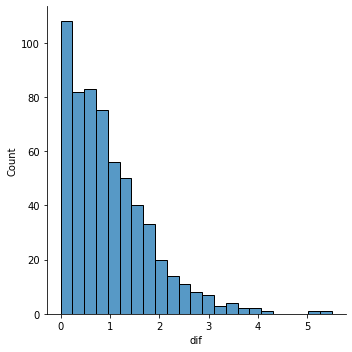

In [19]:
sns.displot(df[df.prediction == 'doublet'], x='dif')

In [21]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets.head()

,doublet,singlet,prediction,dif
TCATTTGGTCACCGCA-1_6,1.995485,-1.792303,doublet,3.787789
GACCTTCAGGACTTCT-1_6,0.676177,-0.399238,doublet,1.075414
ACACGCGAGTACAACA-1_6,0.452940,-1.035750,doublet,1.488690
TTCTAACTCGGTATGT-1_6,0.937032,-0.423973,doublet,1.361005
AAGCGTTCAGAGAATT-1_6,0.718328,-0.313018,doublet,1.031346


In [22]:
doublets.shape

(241, 4)

In [23]:
adata = sc.read_csv("/kaggle/input/a-molecular-singlecell-lung-atlas-of-covid19/GSM5226579_C56ctr_raw_counts.csv/GSM5226579_C56ctr_raw_counts.csv").T
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
adata.obs.head()

,doublet
TAGACTGAGGCATGCA-1_6,False
TCATTTGGTCACCGCA-1_6,True
GACCTTCAGGACTTCT-1_6,True
ACACGCGAGTACAACA-1_6,True
TTCTAACTCGGTATGT-1_6,True


In [24]:
adata = adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 3849 × 34546
    obs: 'doublet'

#### Preprocessing

In [25]:
# label mitochondial genes (mt/MT)
adata.var['mt'] = adata.var_names.str.startswith('MT-')
adata.var

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  


,mt
AL627309.1,False
AL627309.5,False
AL627309.4,False
AL669831.2,False
LINC01409,False
...,...
VN1R2,False
AL031676.1,False
SMIM34A,False
AL050402.1,False


In [26]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [27]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header=None)
ribo_genes.head()

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L


In [28]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var

,mt,ribo
AL627309.1,False,False
AL627309.5,False,False
AL627309.4,False,False
AL669831.2,False,False
LINC01409,False,False
...,...,...
VN1R2,False,False
AL031676.1,False,False
SMIM34A,False,False
AL050402.1,False,False


#### QC Metrics

In [29]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True) # QC Metrics
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL627309.1,False,False,4,0.001039,99.896077,4.0
AL627309.5,False,False,9,0.002338,99.766173,9.0
AL627309.4,False,False,1,0.000260,99.974019,1.0
AL669831.2,False,False,0,0.000000,100.000000,0.0
LINC01409,False,False,163,0.046506,95.765134,179.0
...,...,...,...,...,...,...
VN1R2,False,False,0,0.000000,100.000000,0.0
AL031676.1,False,False,0,0.000000,100.000000,0.0
SMIM34A,False,False,0,0.000000,100.000000,0.0
AL050402.1,False,False,0,0.000000,100.000000,0.0


In [30]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGACTGAGGCATGCA-1_6,False,5885,17690.0,1577.0,8.914641,319.0,1.803279
TGCTCCAAGTGCCGAA-1_6,False,4697,11331.0,721.0,6.363074,208.0,1.835672
ATATCCTTCCGGCTTT-1_6,False,4685,10442.0,717.0,6.866500,131.0,1.254549
GATCAGTGTTGAAGTA-1_6,False,3489,9332.0,146.0,1.564509,7.0,0.075011
CAGGTATCACCCTAGG-1_6,False,4230,9466.0,317.0,3.348827,182.0,1.922671
...,...,...,...,...,...,...,...
CGAGTGCCAGAGGGTT-1_6,False,365,411.0,2.0,0.486618,0.0,0.000000
TTTCGATGTTGATGTC-1_6,False,330,407.0,0.0,0.000000,0.0,0.000000
GTTGTCCCAATGTCTG-1_6,False,360,412.0,22.0,5.339806,0.0,0.000000
CTCTCAGAGGTGCATG-1_6,False,354,406.0,0.0,0.000000,0.0,0.000000


In [31]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL445072.1,False,False,0,0.000000,100.000000,0.0
AC021180.1,False,False,0,0.000000,100.000000,0.0
LINC01816,False,False,0,0.000000,100.000000,0.0
AC093677.3,False,False,0,0.000000,100.000000,0.0
AC010975.1,False,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...
AKAP13,False,False,2427,1.534684,36.944661,5907.0
LPP,False,False,2452,1.807223,36.295142,6956.0
FTX,False,False,2711,2.047285,29.566121,7880.0
NEAT1,False,False,3204,5.380878,16.757599,20711.0


In [33]:
sc.pp.filter_genes(adata, min_cells=3)

In [34]:
adata.var.sort_values('n_cells_by_counts')

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
AC079790.2,False,False,3,0.000779,99.922058,3.0,3
AC090236.2,False,False,3,0.000779,99.922058,3.0,3
AC136475.1,False,False,3,0.000779,99.922058,3.0,3
LINC01926,False,False,3,0.000779,99.922058,3.0,3
IFITM1,False,False,3,0.000779,99.922058,3.0,3
...,...,...,...,...,...,...,...
AKAP13,False,False,2427,1.534684,36.944661,5907.0,2427
LPP,False,False,2452,1.807223,36.295142,6956.0,2452
FTX,False,False,2711,2.047285,29.566121,7880.0,2711
NEAT1,False,False,3204,5.380878,16.757599,20711.0,3204


In [35]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TAGACTGAGGCATGCA-1_6,False,5885,17690.0,1577.0,8.914641,319.0,1.803279
TGCTCCAAGTGCCGAA-1_6,False,4697,11331.0,721.0,6.363074,208.0,1.835672
ATATCCTTCCGGCTTT-1_6,False,4685,10442.0,717.0,6.866500,131.0,1.254549
GATCAGTGTTGAAGTA-1_6,False,3489,9332.0,146.0,1.564509,7.0,0.075011
CAGGTATCACCCTAGG-1_6,False,4230,9466.0,317.0,3.348827,182.0,1.922671
...,...,...,...,...,...,...,...
CGAGTGCCAGAGGGTT-1_6,False,365,411.0,2.0,0.486618,0.0,0.000000
TTTCGATGTTGATGTC-1_6,False,330,407.0,0.0,0.000000,0.0,0.000000
GTTGTCCCAATGTCTG-1_6,False,360,412.0,22.0,5.339806,0.0,0.000000
CTCTCAGAGGTGCATG-1_6,False,354,406.0,0.0,0.000000,0.0,0.000000


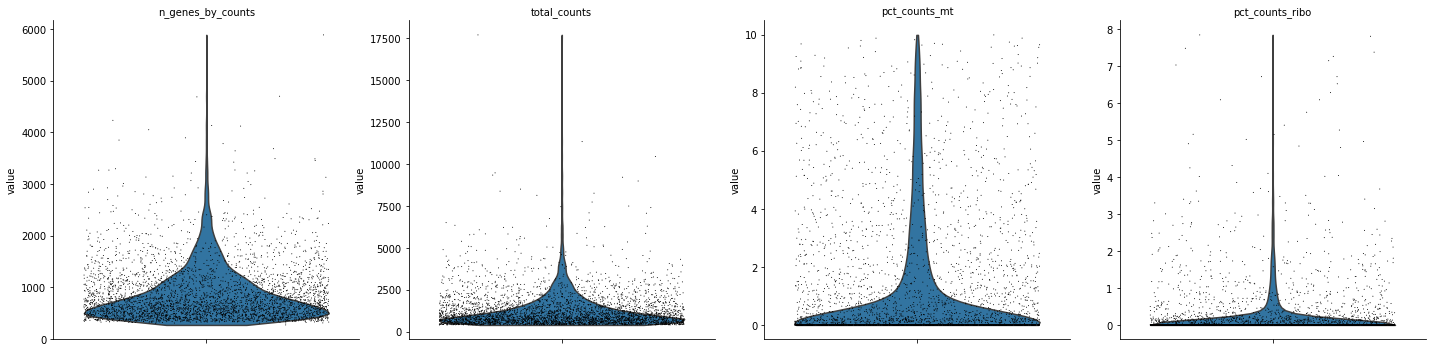

In [36]:
# sc.pp.filter_cells(adtaa, min_genes=200) a good filtering threshold
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
            jitter=0.4, multi_panel=True)

In [37]:
upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
adata = adata[adata.obs.n_genes_by_counts < upper_lim]
adata.obs.tail()

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
CGAGTGCCAGAGGGTT-1_6,False,365,411.0,2.0,0.486618,0.0,0.0
TTTCGATGTTGATGTC-1_6,False,330,407.0,0.0,0.000000,0.0,0.0
GTTGTCCCAATGTCTG-1_6,False,360,412.0,22.0,5.339806,0.0,0.0
CTCTCAGAGGTGCATG-1_6,False,354,406.0,0.0,0.000000,0.0,0.0
TAGAGTCCACCTGCAG-1_6,False,357,401.0,1.0,0.249377,0.0,0.0


In [38]:
adata = adata[adata.obs.pct_counts_mt < 20]
adata = adata[adata.obs.pct_counts_ribo < 2]

#### Normalization

In [39]:
sc.pp.normalize_total(adata, target_sum=1e4)
adata.X.sum(axis=1)
sc.pp.log1p(adata)
adata.raw = adata

/opt/conda/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


#### Clustering

In [40]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.var

,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
AL627309.1,False,False,4,0.001039,99.896077,4.0,4,False,0.005738,1.734740,-2.626926
AL627309.5,False,False,9,0.002338,99.766173,9.0,9,False,0.013273,2.034819,-1.598231
LINC01409,False,False,163,0.046506,95.765134,179.0,163,False,0.355243,2.731183,0.489685
LINC01128,False,False,69,0.018446,98.207327,71.0,69,False,0.134965,2.455575,-0.155846
LINC00115,False,False,6,0.001559,99.844115,6.0,6,False,0.018232,2.589257,0.302428
...,...,...,...,...,...,...,...,...,...,...,...
CST1,False,False,60,0.043388,98.441154,167.0,60,True,0.289770,3.728595,4.829443
CST2,False,False,4,0.001039,99.896077,4.0,4,False,0.005823,1.825881,-2.314488
PCK1,False,False,5,0.001819,99.870096,7.0,5,False,0.014671,2.699117,0.679035
AL121827.2,False,False,27,0.012211,99.298519,47.0,27,False,0.054292,2.464626,-0.124820


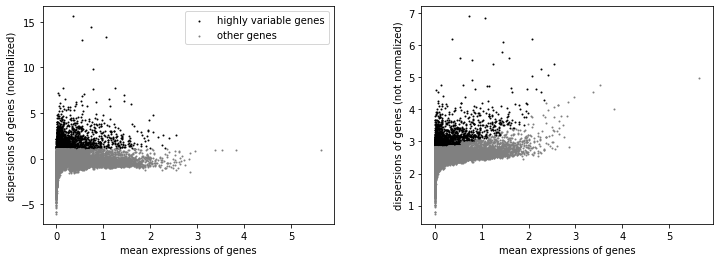

In [41]:
sc.pl.highly_variable_genes(adata)

In [42]:
adata = adata[:,adata.var.highly_variable]
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo']) # remove variability in data

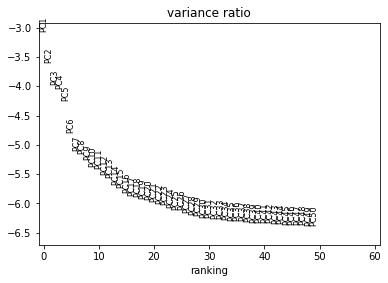

In [43]:
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=60)

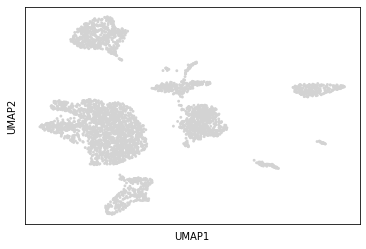

In [44]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata)

In [45]:
! pip install leidenalg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.3 MB/s eta 0:00:0000:0100:010m


In [46]:
sc.tl.leiden(adata, resolution=0.8) # Closer to 1, more clusters. Closer to 0, less clusters

In [47]:
adata.obs

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,leiden
GAAGGGTTCAATCTTC-1_6,False,2081,4764.0,22.0,0.461797,34.0,0.713686,6
TTCACGCAGGCCCAAA-1_6,False,2293,4593.0,401.0,8.730677,0.0,0.000000,5
CAGAGCCAGCGAATGC-1_6,False,2370,4462.0,43.0,0.963693,7.0,0.156880,2
GAGCCTGTCTACGGGC-1_6,False,2098,4503.0,137.0,3.042416,0.0,0.000000,2
TCATGAGGTACAAGTA-1_6,False,2285,4365.0,11.0,0.252005,1.0,0.022910,1
...,...,...,...,...,...,...,...,...
CGAGTGCCAGAGGGTT-1_6,False,365,411.0,2.0,0.486618,0.0,0.000000,5
TTTCGATGTTGATGTC-1_6,False,330,407.0,0.0,0.000000,0.0,0.000000,0
GTTGTCCCAATGTCTG-1_6,False,360,412.0,22.0,5.339806,0.0,0.000000,6
CTCTCAGAGGTGCATG-1_6,False,354,406.0,0.0,0.000000,0.0,0.000000,5


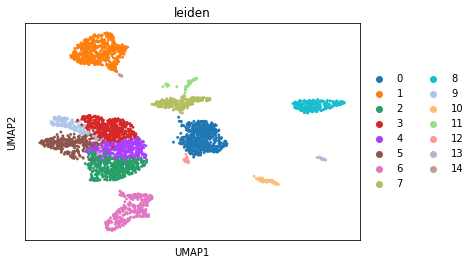

In [48]:
sc.pl.umap(adata, color=['leiden'])

#### Integration of multiple samples
###### Takes a lot of time

In [49]:
def preprocess_samples(path):
    adata = sc.read_csv(path).T
    sc.pp.filter_genes(adata, min_cells=10)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adata = sc.read_csv(path).T
    adata.obs["Sample"] = path.split('_')[1]
    
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    
    sc.pp.filter_cells(adata, min_genes=200) # get rid of cells with fewer than 200 genes
    # sc.pp.filter_genes(adata, min_cells=3) # get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('MT-')
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]
    
    return adata

In [1]:
out = []

for filename in files[9:18]:
    out.append(preprocess_samples(filename))


NameError: name 'files' is not defined

In [ ]:
from scipy.sparse import csr_matrix
adata = sc.concat(out)
adata.X = csr_matrix(adata.X)

adata.write_h5ad('combined.h5ad')

In [ ]:
adata = sc.read_h5ad('combined.h5ad')
adata.obs.groupby('Sample').count()

In [ ]:
sc.pp.filter_genes(adata, min_cells=100) # remove genes that are in less than 100 cells
adata.layers['counts'] = adata.X.copy() # save raw data before normalization
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

adata.obs.head()

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000, subset=True, layer='counts',
                           flavor="seurat_v3", batch_key="Sample") # no batch key if one sample

In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"], #batch, technology
                             continuous_covariate_keys=["pct_counts_mt", "total_counts", "pct_counts_ribo"])

In [ ]:
model = scvi.model.SCVI(adata)
model.train() # may take a while without GPU

In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size=1e4)
sc.pp.neighbors(adata, use_rep='X_scVI')
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.7)
adata.write_h5ad('integrated.h5ad')
sc.pl.umap(adata, color=['leiden', 'Sample'], frameon=False)

#### Find markers/label cell types

In [ ]:
sc.tl.leiden(adata, resolution=0.8)
sc.tl.rank_genes_groups(adata, 'leiden')
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

In [ ]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]

markers.head(10)

In [ ]:
markers_scvi = model.differential_expression(groupby='leiden')
markers_scvi

In [ ]:
cell_types = 
{"0": "Macrophage",
"1": "Fibroblast",
"2": "CD4+ T-cell",
"3": "AT2",
"4": "AT1",
"5": "CD8+ T-cell",
"6": "Endothelial cell",
"7": "Plasma cell",
"8": "Macrophage",
"9": "AT2",
"10": "Fibroblast",
"11": "Fibroblast",
"12": "Macrophage",
"13": "Macrophage",
"14": "Airway epithelial",
"15": "Airway epithelial",
"16": "Monocyte",
"17": "Airway epithelial",
"18": "B-cell",
"19": "Aerocyte",
"20": "Airway epithelial",
"21": "Smooth muscle cell",
"22": "Cycling T/NK",
"23": "Neuronal cell",
"24": "Dendridic cell",
"25": "Pericyte",
"26": "Fibroblast",
"27": "Erythroid-like",
"28": "Macrophage"}

In [ ]:
sc.pl.umap(adata, color=['leiden'], frameon=False, legend_loc='on data')

In [ ]:
sc.pl.umap(adata, color=["ACTA2", "PDGFRB", "MYL9"], frameon=False, layer="scvi_normalized") ## Finding Biomarkers

In [ ]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_types)
sc.pl.umap(adata, color=['cell type'], frameon=False)

In [ ]:
adata.uns['scvi-markers'] = markers_scvi
adata.uns['markers'] = markers
adata.write_h5ad('integrated.h5ad')
model.save("model.model")

#### Analysis

In [ ]:
adata = sc.read_h5ad('integrated.h5ad')
adata.obs.Sample.unique().tolist()

In [ ]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'Control'

In [ ]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)
adata.obs.head()

In [ ]:
num_tot_cells = adata.obs.groupby(["sample"]).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

In [ ]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition', 'cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis=1) > 0].reset_index()[0:4]
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)
cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells

cell_type_counts.head()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
ax = sns.boxplot(data=cell_type_counts, x='cell_type', y='frequency', hue='condition')
plt.xticks(rotation=35, rotation_mode='anchor', ha='right')
plt.show()

#### Differential Expression

##### 1. Using diffxpy

In [ ]:
! pip install diffxpy
import diffxpy.api as de

In [ ]:
subset = adata[adata.obs['cell_type'].isin(['AT1', 'AT2'])].copy()
subset.X = subset.X.toarray() # convert to dense array
sc.pp.filter_genes(subset, min_cells=100)

In [ ]:
# COVID/NON-CoVID
# res = de.test.wald(data=subset, \
#                    formula_loc='~1 + condition', factor_loc_totest='condition')


res = de.test.wald(data=subset, formula_loc='~1+cell_type', factor_loc_totest='cell_type')
diff_exp_df = res.summary().sort_values('log2fc', ascending=False).reset_index9drop=True
diff_exp_df.head()

In [ ]:
subset.obs.cell_type.unique() # second group is reference group

In [ ]:
most_expressed = diff_exp_df.iloc[0].gene
i = np.where(subset.var.names == most_expressed)[0][0]

a = subset[subset.obs.cell_type == 'AT1'].X[:, i]
b = subset[subset.obs.cell_type == 'AT2'].X[:, i]

print(f"{most_expressed} expression")
print(f"AT1: {a.mean()} +/- {a.std()}")
print(f"AT1: {b.mean()} +/- {b.std()}")

In [ ]:
diff_exp_df = diff_exp-df[(diff_exp_df < 0.05) & (abs(diff_exp_df) > .5)]
diff_exp_df.head()

In [ ]:
diff_exp_df = diff_exp_df[diff_exp_df['mean'] > 0.15]
diff_exp_df.head()

In [ ]:
genes_to_show = diff_exp_df[-25].gene.tolist() + diff_exp_df[:25].gene.tolist() # top and botton 25 genes

##### 2. Using SCVI

In [ ]:
model = scvi.model.SCVI.load('model.model', adata)

In [ ]:
scvi_de = model.differential_expression(
            idx1=[adata.obs['cell_type'] == 'AT1'],
            idx2=[adata.obs['cell_type'] == 'AT2'])

scvi-de.head()

In [ ]:
scvi_de = scvi_de[(scvi_de['is_de_fdr_0.05']) & (abs(scvi_de.lfc_mean)> .5)]
scvi_de = scvi_de.sort_values('lfc_mean')
scvi_de.head()

In [ ]:
scvi_de = scvi_de[(scvi_de.raw_normalized_mean1 > .5) | scvi_de.raw_normalized_mean2> .5]

In [ ]:
genes_to_show = scvi-de[-25:].index.tolist() + scvi_de[:25].index.tolist()
sc.pl.heatmap(subset, genes_to_show, groupby='cell_type', swap_axes=True, layer='scvi_normalized', log=True)

##### GO Enrichment

In [ ]:
! pip install gseapy
import gseapy as gp

In [ ]:
gp.get_library_name()

In [ ]:
up_regulatedd_genes = diff_exp_df[diff_exp_df > 0].gene.tolist()

In [ ]:
enr = gp.enrichr(gene_list=up_regulated_genes,
                gene_sets=['KEGG_2021_Human'],
                organism='human',
                outdir=None,
                background=subset.var_names.tolist())

In [ ]:
enr.results